In [1]:
import hyperopt.pyll.stochastic
from hyperopt import hp,tpe,fmin,Trials, STATUS_OK

In [14]:
space = {
    'k': hp.choice('k', [3,4,5,6,7,8,9,10,11]),
    'c': hp.choice('c', [2,3,4,5,6,7,8,9,10])
}

In [2]:
def sequenceSegmentation(speakerSequence,k,C):
    #print(type(speakerSequence))
    sepPosition=[]
    
    tempList=[speakerSequence[0]]
    #setList=set(tempList)
    #tempList=[]#list(setList)
    count=1
    #print(tempList)
    #count= 1 if tempList[0]==tempList[1] else 2
    for i in range(1,len(speakerSequence)):
        #print(tempList,speakerSequence[i])
        if speakerSequence[i]==tempList[-1]:
            #print('true')
            continue
        elif speakerSequence[i] == tempList[0]:
            tempList.pop(0)
            tempList.append(speakerSequence[i])
        elif speakerSequence[i] in tempList:
            tempList.pop(0)
            tempList.append(speakerSequence[i])
        else:
            if len(tempList)<=k:
                tempList.append(speakerSequence[i])
                count=count+1
            if count==C:
                tempList=tempList[C-1:]
                sepPosition.append(i-C+1)
                count=0
                #pos=i-pos
            else:
                continue
                
                #print(pos,)
                
    return sepPosition

In [3]:
manScene=[1,2,3,4,5,6]
cluster=[1,1,1,2,2,1,1,1,3,3,3,4,4,4,3,3,5,5,3,3,1,1,1,2,2,1,1,1,3,3,3,4,4,4,3,3,5,5,3,3,1,1,1,2,2,1,1,1,3,3,3,4,4,4,3,3,5,5,3,3]

In [4]:
cluster[0:2]

[1, 1]

In [5]:
minDiff=[]
for i in range(3,11):
    for j in range(2,10):
        if (j<=i):
            sepPos=sequenceSegmentation(cluster,i,j)
            minDiff.append(list((abs(len(sepPos)-len(manScene)),j,i)))
        else:
            break

In [6]:
print(sepPos)

[]


In [7]:
print(minDiff)

[[3, 2, 3], [4, 3, 3], [2, 2, 4], [3, 3, 4], [4, 4, 4], [1, 2, 5], [2, 3, 5], [3, 4, 5], [4, 5, 5], [0, 2, 6], [2, 3, 6], [3, 4, 6], [4, 5, 6], [4, 6, 6], [1, 2, 7], [2, 3, 7], [3, 4, 7], [4, 5, 7], [4, 6, 7], [4, 7, 7], [1, 2, 8], [2, 3, 8], [3, 4, 8], [4, 5, 8], [4, 6, 8], [4, 7, 8], [5, 8, 8], [1, 2, 9], [2, 3, 9], [3, 4, 9], [4, 5, 9], [4, 6, 9], [4, 7, 9], [5, 8, 9], [6, 9, 9], [1, 2, 10], [2, 3, 10], [3, 4, 10], [4, 5, 10], [4, 6, 10], [4, 7, 10], [5, 8, 10], [6, 9, 10]]


In [8]:
 sepPos=sequenceSegmentation(cluster,7,2)

In [9]:
print(sepPos)

[2, 7, 15, 22, 35, 42, 55]


In [10]:
j=0
for i in range(len(sepPos)):
    print(cluster[j:sepPos[i]+1])
    j=sepPos[i]+1
print(cluster[j:])

[1, 1, 1]
[2, 2, 1, 1, 1]
[3, 3, 3, 4, 4, 4, 3, 3]
[5, 5, 3, 3, 1, 1, 1]
[2, 2, 1, 1, 1, 3, 3, 3, 4, 4, 4, 3, 3]
[5, 5, 3, 3, 1, 1, 1]
[2, 2, 1, 1, 1, 3, 3, 3, 4, 4, 4, 3, 3]
[5, 5, 3, 3]


In [11]:
def getValues():
    return manScene,cluster

def kc(space):
    k=space['k']
    c=space['c']
    manScene,clustrThreads=getValues()
    if c <= k:
        sepPos=sequenceSegmentation(clustrThreads,k,c)
        #print(k,c,len(sepPos),abs(len(sepPos)-len(manScene)))
        return abs(len(sepPos)-len(manScene))
    else:
        return 100

In [15]:
trials = Trials()
best = fmin(
    fn=kc,
    space=space,
    algo=tpe.suggest,
    trials=trials,
    max_evals=50
)

In [16]:
best

{'c': 0, 'k': 2}

In [17]:
minList=[trials.trials[i]['result']['loss'] for i in range(len(trials.trials))]

a=minList.index(min(minList))
trials.trials[a]['misc']['vals'],trials.trials[a]['result']['loss']

({'c': [0], 'k': [2]}, 1.0)

In [22]:
sepPos=sequenceSegmentation(cluster,5,2)
abs(len(sepPos)-len(manScene))
c=0
listscene=[]
for i in sepPos:
    listscene.append(cluster[c:i])
    c=i
listscene.append(cluster[c:])

In [23]:
listscene

[[1, 1],
 [1, 2, 2, 1, 1],
 [1, 3, 3, 3, 4, 4, 4, 3],
 [3, 5, 5, 3, 3, 1, 1],
 [1, 2, 2, 1, 1, 1, 3, 3, 3, 4, 4, 4, 3],
 [3, 5, 5, 3, 3, 1, 1, 1, 2, 2, 1, 1, 1, 3, 3, 3, 4, 4, 4, 3, 3, 5, 5, 3, 3]]

In [ ]:
for i in range(len(trials.trials)):
    print(trials.trials[i]['result']['loss'],trials.trials[i]['misc']['vals'])

In [25]:
def getDifferThreads(threads,window=5):
    sepPos=[]
    sw=0
    for i in range(window+1,(len(threads)-window)):
        print(threads[i-1:window+i-1],threads[i:window+i])
        comp=len(set(threads[i-1:window+i-1]))
        windowlist=threads[i:window+i]
        uniqueThreads=len(set(windowlist))
        print(comp,uniqueThreads)
        if comp==1:
            continue
        elif comp!=uniqueThreads:
            sepPos.append(i+window-1)
        else:
            continue
    return sepPos

In [26]:
def getUsingset(threads,window=5):
    sepPos=[]
    intValue=[]
    sw=0
    for i in range(window+1,(len(threads))):
        #print(threads[i-window-1:i-1],threads[i:i+window])
        prevWind=set(threads[i-window-1:i-1])
        nextWind=set(threads[i:i+window])
        intUnion=(len(prevWind.intersection(nextWind))/len(prevWind.union(nextWind)))
        intValue.append(intUnion)
        if intUnion==0.0 or intUnion>0.5:
            sepPos.append(i)
        else:
            continue
    return sepPos,intValue

In [27]:
import matplotlib.pyplot as plt

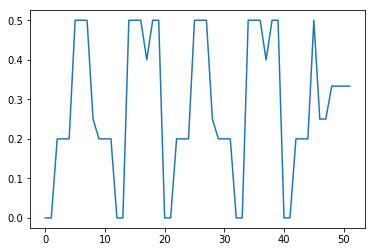

In [28]:
sepPos,intVal=getUsingset(cluster,7)
plt.plot(intVal)

In [29]:
print(intVal)

[0.0, 0.0, 0.2, 0.2, 0.2, 0.5, 0.5, 0.5, 0.25, 0.2, 0.2, 0.2, 0.0, 0.0, 0.5, 0.5, 0.5, 0.4, 0.5, 0.5, 0.0, 0.0, 0.2, 0.2, 0.2, 0.5, 0.5, 0.5, 0.25, 0.2, 0.2, 0.2, 0.0, 0.0, 0.5, 0.5, 0.5, 0.4, 0.5, 0.5, 0.0, 0.0, 0.2, 0.2, 0.2, 0.5, 0.25, 0.25, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


In [30]:
#sepPos=getDifferThreads(cluster,3)
#abs(len(sepPos)-len(manScene))
c=0
listscene=[]
for i in sepPos:
    if (i-c)!=1:
        listscene.append(cluster[c:i])
        c=i
listscene.append(cluster[c:])

In [31]:
listscene

[[1, 1, 1, 2, 2, 1, 1, 1],
 [3, 3, 3, 4, 4, 4, 3, 3, 5, 5, 3, 3],
 [1, 1, 1, 2, 2, 1, 1, 1],
 [3, 3, 3, 4, 4, 4, 3, 3, 5, 5, 3, 3],
 [1, 1, 1, 2, 2, 1, 1, 1],
 [3, 3, 3, 4, 4, 4, 3, 3, 5, 5, 3, 3]]

In [243]:
print(cluster)

[1, 1, 1, 2, 2, 1, 1, 1, 3, 3, 3, 4, 4, 4, 3, 3, 5, 5, 3, 3, 1, 1, 1, 2, 2, 1, 1, 1, 3, 3, 3, 4, 4, 4, 3, 3, 5, 5, 3, 3, 1, 1, 1, 2, 2, 1, 1, 1, 3, 3, 3, 4, 4, 4, 3, 3, 5, 5, 3, 3]


In [32]:
print(sepPos)

[8, 9, 20, 21, 28, 29, 40, 41, 48, 49]
